In [1]:
# Import used packages
%matplotlib notebook
import numpy as np
from scipy import spatial, optimize
import matplotlib.pyplot as plt
import random
from matplotlib import animation
import time

In [2]:
# Create positions in rectangle of xlen x ylen
def randompos(nodes, xLen, yLen):
    pos = []
    for i in range(nodes):
        pos.append([xLen*random.uniform(0, 1), yLen*random.uniform(0, 1)])
    return pos

# Link nodes using KDtrees
def linknodesKDtree(pos, radius):
    treePos = spatial.KDTree(pos)
    links = treePos.query_ball_tree(other= treePos, r= radius)
    for i in range(len(links)):
        links[i].remove(i)
    return links

# Create network in a dictionary structure
def createnetwork(nodes, radius, xLen, yLen):
    Network = {'nodes': nodes, 'pos': randompos(nodes, xLen, yLen)}
    Network['links'] = linknodesKDtree(Network['pos'], radius)
    return Network

# plot nodes
def plotnodes(pos, ax, sizeNodes, colorNodes):
    ax.scatter([item[0] for item in pos], [item[1] for item in pos], s= sizeNodes, c= colorNodes, zorder= 2)
    
#plot edges
def plotedges(pos, ax, links, colorEdges, alphaEdges):
    xList = []
    yList = []
    for i in range(len(links)):
        for node in links[i]:
            if node > i:
                xList += [pos[i][0]]
                yList += [pos[i][1]]
                xList += [pos[node][0]]
                yList += [pos[node][1]]
                xList += [np.nan]
                yList += [np.nan]
    ax.plot(xList, yList, color = colorEdges, alpha= alphaEdges, zorder= 1)
    
# Plot a random graph
def plotrandomgraph(nodes, radius, xlen, ylen, sizeNodes, colorNodes, colorEdges, alphaEdges):
    Network = createnetwork(nodes, radius, xlen, ylen)
    fig, ax = plt.subplots(figsize = [6*xlen, 6*ylen])
    plt.axis('off')
    plotedges(Network['pos'], ax, Network['sets'], colorEdges, alphaEdges)
    plotnodes(Network['pos'], ax, sizeNodes, colorNodes)

In [3]:
# remove a fraction of edges from the network (can do something if removePerc > 0.5 to get little bit faster speed)
def removeedges(links, removePerc):
    removeN = round(sum(map(len, links))*removePerc/2)
    for i in range(removeN):
        randomNode = random.choice(random.choices(links, weights= map(len, links), k= 1)[0])
        randomConnectedNode = random.choice(links[randomNode])
        links[randomNode].remove(randomConnectedNode)
        links[randomConnectedNode].remove(randomNode)
    return links

In [8]:
radius = 0.12
timeListr = []
stepList = [128, 256, 512, 1024, 2048, 4096, 8192]
for i in stepList:
    startTime = time.time()
    createnetwork(i, radius, 1, 1)
    timeListr.append((time.time() - startTime))
    print(i)
print(timeListr)

128
256
512
1024
2048
4096
8192
[0.03889298439025879, 0.052858591079711914, 0.12167620658874512, 0.38210010528564453, 1.5732600688934326, 3.7048165798187256, 12.377900123596191]


In [9]:
timeList = []
stepList = [128, 256, 512, 1024, 2048, 4096, 8192]
for i in stepList:
    startTime = time.time()
    createnetwork(i, np.sqrt(2), 1, 1)
    timeList.append((time.time() - startTime))
    print(i)
print(timeList)

128
256
512
1024
2048
4096
8192
[0.003735065460205078, 0.02094578742980957, 0.08474993705749512, 0.14914751052856445, 0.5410218238830566, 2.7574658393859863, 13.14939022064209]


In [ ]:
def kwadratic(x, a, b, c):
    return a*x**2 + b*x + c

par, parCov = optimize.curve_fit(kwadratic, stepList, timeList)
print(par)

parr, parrCov = optimize.curve_fit(kwadratic, stepList, timeListr)
print(parr)

<IPython.core.display.Javascript object>


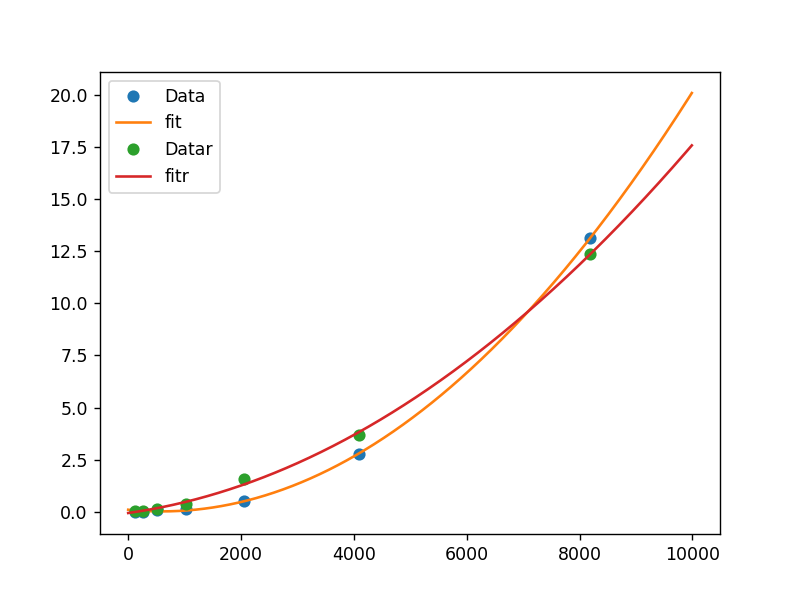

In [12]:
fig = plt.figure()
functionList = np.arange(0, 10000, 10)
plt.plot(stepList, timeList, 'o', label= 'Data')
plt.plot(functionList, kwadratic(functionList, par[0], par[1], par[2]), label= 'fit')
plt.plot(stepList, timeListr, 'o', label= 'Datar')
plt.plot(functionList, kwadratic(functionList, parr[0], parr[1], parr[2]), label= 'fitr')
plt.legend()
plt.show()
# Kan dit wel sneller dan O(n**2)? als n nodes dan n-1+n-2+... = (n-1)(n-2)/2 edges -> O(n**2)
# Kan dit wel sneller dan O(n**2)? als n nodes en radius r dan heeft iedere node een verwacht aantal connecties 
# van n*(pi*r**2)/1 en dus verwacht aantal edges van n*(pi*r**2)*n/2 -> O(n**2)

In [7]:
# Test speed of networkx equivalent things
import networkx as nx
import scipy
runs = 1
radius = np.sqrt(2)
timeListnx = []
stepList = [32, 64, 128, 256, 512, 1024, 2048, 4096]
for i in stepList:
    startTime = time.time()
    for j in range(runs):
        nx.random_geometric_graph(i, radius)
    timeListnx.append((time.time() - startTime)/runs)
    print(i)
timeListnx

32
64
128
256
512
1024
2048
4096


[0.002963542938232422,
 0.0019974708557128906,
 0.0019936561584472656,
 0.00997471809387207,
 0.031914710998535156,
 0.12366962432861328,
 0.5614969730377197,
 2.563143491744995]

In [8]:
def kwadratic(x, a, b, c):
    return a*x**2 + b*x + c

parnx, parCovnx = optimize.curve_fit(kwadratic, stepList, timeListnx)
parnx

array([ 1.87154852e-06, -9.88231849e-04,  1.43229361e-01])

<IPython.core.display.Javascript object>


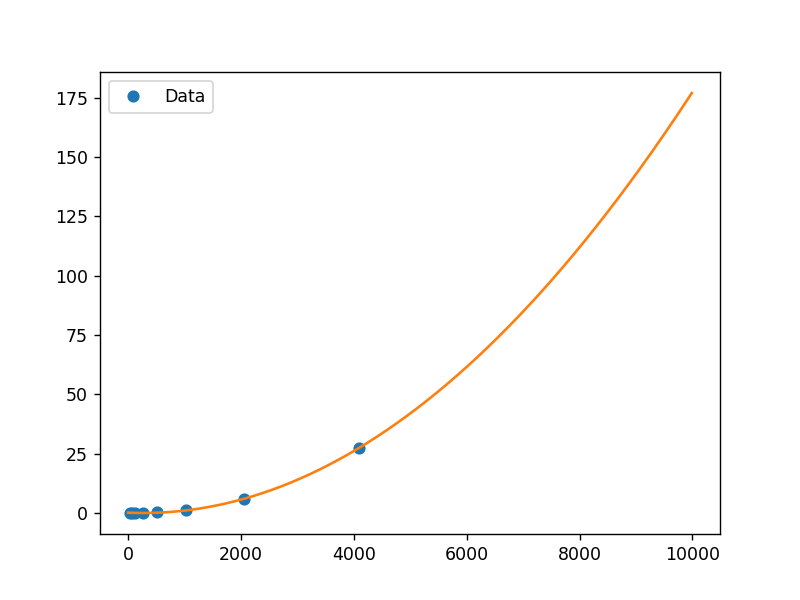

In [10]:
fig = plt.figure()
functionList = np.arange(0, 10000, 10)
plt.plot(stepList, timeListnx, 'o', label= 'Data')
plt.plot(functionList, kwadratic(functionList, parnx[0], parnx[1], parnx[2]))
plt.legend()
plt.show()

In [12]:
np.array(timeListnx)/np.array(timeList)

array([ 4.19026549,  3.49450943,  8.00382684,  7.89889332,  8.56244584,
       10.02480586, 10.31618465, 10.73969265])